In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def calculate_parameters(layer_sizes):
    """
    Calculates the total number of parameters (weights and biases) in a fully connected
    neural network given a list of layer sizes.

    Args:
        layer_sizes (tuple or list): A tuple or list of integers representing the
                                     number of neurons in each layer.

    Returns:
        int: The total number of parameters in the network.
    """
    total_params = 0
    # Iterate through the pairs of consecutive layers
    for i in range(len(layer_sizes) - 1):
        # Calculate the number of weights between the current layer and the next one
        num_weights = layer_sizes[i] * layer_sizes[i + 1]
        # Each neuron in the next layer has one bias
        num_biases = layer_sizes[i + 1]
        # Add the weights and biases to the total count
        total_params += num_weights + num_biases
    return total_params

# Example usage with the layer sizes you provided
network_layers = (3, 20, 20, 20, 20, 1)
num_params = calculate_parameters(network_layers)
print(f"The number of parameters for the neural network with layer sizes {network_layers} is: {num_params}")

network_layers = (3, 30, 30, 30, 30, 1)
num_params = calculate_parameters(network_layers)
print(f"The number of parameters for the neural network with layer sizes {network_layers} is: {num_params}")

network_layers = (10, 100, 100, 100, 100, 1)
num_params = calculate_parameters(network_layers)
print(f"The number of parameters for the neural network with layer sizes {network_layers} is: {num_params}")

The number of parameters for the neural network with layer sizes (3, 20, 20, 20, 20, 1) is: 1361
The number of parameters for the neural network with layer sizes (3, 30, 30, 30, 30, 1) is: 2941
The number of parameters for the neural network with layer sizes (10, 100, 100, 100, 100, 1) is: 31501


In [7]:
Re = 40

xmin = -0.5
xmax = 1.0
ymin = -0.5
ymax = 1.5

In [65]:
@np.vectorize()
def f(x, y):
    nu = 1.0 / Re
    lambda_val = (1.0 / (2.0 * nu)) - np.sqrt(1.0 / (4.0 * nu**2) + 4.0 * np.pi**2)

    sd = 0.05

    xmin_factor = np.tanh((x - xmin) / sd)
    xmax_factor = np.tanh((xmax - x) / sd)
    keep_in_x = xmin_factor * xmax_factor

    ymin_factor = np.tanh((y - ymin) / sd)
    ymax_factor = np.tanh((ymax - y) / sd)
    keep_in_y = ymin_factor * ymax_factor

    uxmin = 1.0 - np.exp(lambda_val * xmin) * np.cos(2 * np.pi * y)
    uxmax = 1.0 - np.exp(lambda_val * xmax) * np.cos(2 * np.pi * y)
    vxmin = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * xmin) * np.sin(2 * np.pi * y)
    vxmax = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * xmax) * np.sin(2 * np.pi * y)
    pxmin = 0.5 * (1.0 - np.exp(lambda_val * xmin))
    pxmax = 0.5 * (1.0 - np.exp(lambda_val * xmax))

    uymin = 1.0 - np.exp(lambda_val * x) * np.cos(2 * np.pi * ymin)
    uymax = 1.0 - np.exp(lambda_val * x) * np.cos(2 * np.pi * ymax)
    vymin = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * x) * np.sin(2 * np.pi * ymin)
    vymax = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * x) * np.sin(2 * np.pi * ymax)
    pymin = 0.5 * (1.0 - np.exp(lambda_val * x))
    pymax = 0.5 * (1.0 - np.exp(lambda_val * x))

    c1 = 1.0 - np.exp(lambda_val * xmin) * np.cos(2 * np.pi * ymin) # u(xmin, ymin)
    c2 = 1.0 - np.exp(lambda_val * xmax) * np.cos(2 * np.pi * ymin) # u(xmax, ymin)
    c3 = 1.0 - np.exp(lambda_val * xmin) * np.cos(2 * np.pi * ymax) # u(xmin, ymax)
    c4 = 1.0 - np.exp(lambda_val * xmax) * np.cos(2 * np.pi * ymax) # u(xmax, ymax)

    # 2. Calculate normalized coordinates
    x_hat = (x - xmin) / (xmax - xmin)
    y_hat = (y - ymin) / (ymax - ymin)

    # 3. Calculate the "Boundary" function B(x, y) using bilinear interpolation
    B_u = ( (1 - x_hat) * uxmin + x_hat * uxmax + 
        (1 - y_hat) * uymin + y_hat * uymax -
        ((1 - x_hat) * (1 - y_hat) * c1 +
        x_hat * (1 - y_hat) * c2 +
        (1 - x_hat) * y_hat * c3 +
        x_hat * y_hat * c4) )

    # c1_p = 0.5 * (1.0 - np.exp(2 * lambda_val * xmin))
    # c2_p = 0.5 * (1.0 - np.exp(2 * lambda_val * xmax))

    # B_p = ( (1 - x_hat) * pxmin + x_hat * pxmax +
    #         (1 - y_hat) * pymin + y_hat * pymax -
    #         ( (1 - x_hat) * (1 - y_hat) * c1_p +
    #         x_hat * (1 - y_hat) * c2_p +
    #         (1 - x_hat) * y_hat * c1_p +
    #         x_hat * y_hat * c2_p ) )

    # 4. Calculate the "Zeroing" function A(x, y)
    # You can use the simple polynomial or your tanh version
    A = (x - xmin) * (xmax - x) * (y - ymin) * (ymax - y)
    # Note: I swapped (x - xmax) to (xmax - x) to make A(x,y) positive inside the domain,
    # which can sometimes help with stability, but it's not strictly necessary.

    B_p = 0.5 * (1.0 - np.exp(2.0 * lambda_val * x))
    
    
    vxmin = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * KovasznayFlow.xmin) * np.sin(2 * np.pi * y)
    vxmax = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * KovasznayFlow.xmax) * np.sin(2 * np.pi * y)
    vymin = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * x) * np.sin(2 * np.pi * KovasznayFlow.ymin)
    vymax = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * x) * np.sin(2 * np.pi * KovasznayFlow.ymax)

    c1_v = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * KovasznayFlow.xmin) * np.sin(2 * np.pi * KovasznayFlow.ymin)
    c2_v = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * KovasznayFlow.xmax) * np.sin(2 * np.pi * KovasznayFlow.ymin)
    c3_v = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * KovasznayFlow.xmin) * np.sin(2 * np.pi * KovasznayFlow.ymax)
    c4_v = (lambda_val / (2 * np.pi)) * np.exp(lambda_val * KovasznayFlow.xmax) * np.sin(2 * np.pi * KovasznayFlow.ymax)

    B_v = ( (1 - x_hat) * vxmin + x_hat * vxmax +
            (1 - y_hat) * vymin + y_hat * vymax -
            ( (1 - x_hat) * (1 - y_hat) * c1_v +
            x_hat * (1 - y_hat) * c2_v +
            (1 - x_hat) * y_hat * c3_v +
            x_hat * y_hat * c4_v ) )

    final_u = B_v

    return final_u

In [62]:
from problems import KovasznayFlow
problem = KovasznayFlow()

In [66]:
X, Y, u_solution, v_solution, p_solution = problem.exact_solution(nx=32, ny=32)

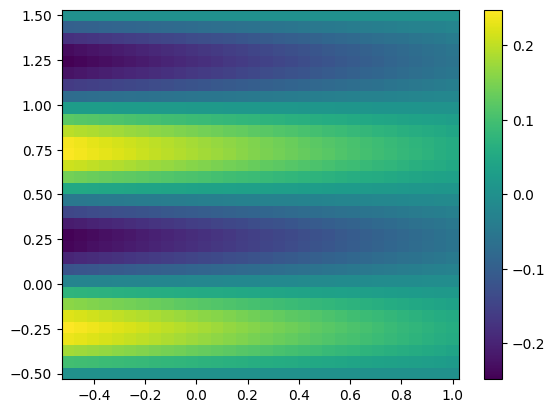

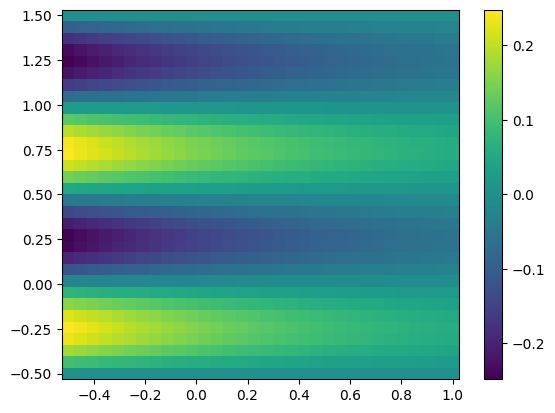

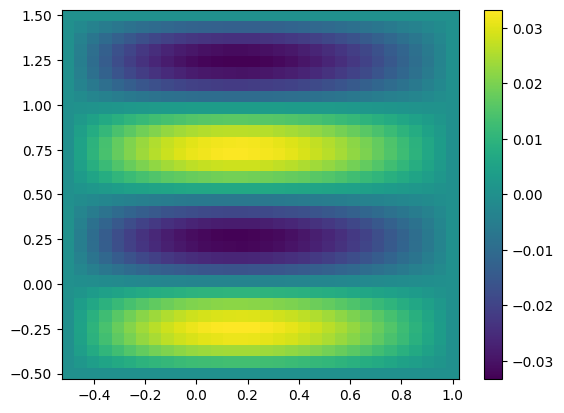

In [67]:
F = f(X, Y)
im = plt.pcolormesh(X, Y, F)
plt.colorbar(im)
plt.show()

im = plt.pcolormesh(X, Y, v_solution)
plt.colorbar(im)
plt.show()

im = plt.pcolormesh(X, Y, F - v_solution)
plt.colorbar(im)
plt.show()

In [70]:
@np.vectorize()
def g(x, y):
    sd = 0.1

    A = np.tanh((x - KovasznayFlow.xmin) / sd) * np.tanh((KovasznayFlow.xmax - x) / sd) * \
        np.tanh((y - KovasznayFlow.ymin) / sd) * np.tanh((KovasznayFlow.ymax - y) / sd)
    return A

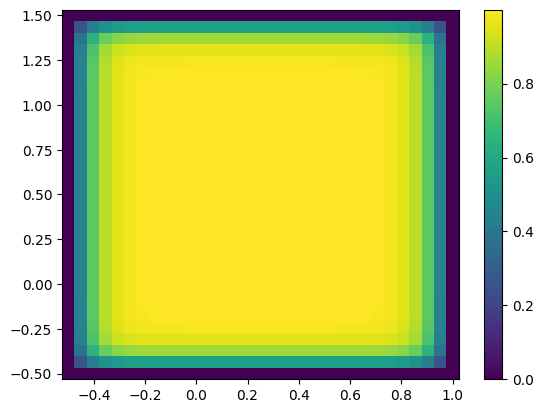

In [71]:
F = g(X, Y)
im = plt.pcolormesh(X, Y, F)
plt.colorbar(im)
plt.show()

In [ ]:
class FCN(eqx.Module):
    """A simple fully connected neural network (MLP) using Equinox."""
    # The list of trainable neural network layers.
    layers: list
    # The activation function is marked as 'static' so JAX transformations (like grad) ignore it.
    activation: Callable = eqx.field(static=True)

    def __init__(self, key: jax.random.PRNGKey, layer_sizes: list[int] = None, activation: Callable = jax.nn.tanh):
        self.activation = activation
        self.layers = []
        # Loop through the desired layer sizes to build the network.
        for i in range(len(layer_sizes) - 1):
            # Split the key to get a new, unique key for each layer, ensuring independent initialisation.
            key, subkey = jax.random.split(key)
            # Create a linear layer and add it to the list.
            self.layers.append(eqx.nn.Linear(layer_sizes[i], layer_sizes[i + 1], key=subkey))

    def __call__(self, xt: jnp.ndarray) -> jnp.ndarray:
        """
        Forward pass of the PINN, with hard-constraints for BC/IC.
        
        This method uses an ansatz to enforce the conditions:
        u(x,t) = (1-g(t))*IC(x) + B(x)*g(t)*NN(x,t)
        where g(t) is a smooth function that is 0 at t=0 and 1 otherwise,
        and B(x) is a function that is 0 at the spatial boundaries.
        """
        # Unpack the spatial and temporal coordinates from the input.
        x, t = xt[0], xt[1]
        
        # --- 1. Calculate the raw neural network output ---
        nn_input = xt
        for i, layer in enumerate(self.layers):
            # Apply the linear transformation.
            nn_input = layer(nn_input)
            # Apply the activation function to all but the final layer.
            if i < len(self.layers) - 1:
                nn_input = self.activation(nn_input)
        # The final raw output from the network.
        nn_output = nn_input[0]

        # --- 2. Apply hard constraints via the ansatz ---
        # A small value to control the steepness of the tanh smooth steps.
        sd = 0.1
        
        # Create a smooth function that is ~0 at t=0 and ~1 for t>0.
        # This 'switches on' the neural network's contribution after the initial time.
        time_factor = jax.nn.tanh(t / sd)
        
        # Create a smooth function that is 0 at the boundaries (x=-1 and x=1).
        # This forces the neural network's contribution to zero at the spatial boundaries.
        boundary_factor = jax.nn.tanh((x + 1) / sd) * jax.nn.tanh((1 - x) / sd)
        
        # Define the initial condition of the problem.
        initial_condition = -jnp.sin(jnp.pi * x)

        # Combine the components to construct the final solution `u(x,t)`.
        # This structure guarantees that u(x,0) equals the initial condition and that
        # the boundary conditions are met for all t.
        u = initial_condition * (1-time_factor) + boundary_factor * time_factor * nn_output
        
        return u